# Breast Cancer prediction using different classifiers

### Problem Statement:

Predict Breast cancer using the following classifiers

(1) Support Vector classifier

(2) Logistic Regression

(3) Random Forest Classifier

(4) Decision Tree classifier

(5) K Nearest Neighbours

(6) Naive Bayes

Link for the dataset : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data,
https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

### About the dataset:

The description about the data set can be downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names



#### Using the Wisconsin breast cancer diagnostic data set for predictive analysis


Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
-3-32.Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    
    b) texture (standard deviation of gray-scale values)
    
    c) perimeter
    
    d) area
    
    e) smoothness (local variation in radius lengths)
    
    f) compactness (perimeter^2 / area - 1.0)
    
    g). concavity (severity of concave portions of the contour)
    
    h). concave points (number of concave portions of the contour)
    
    i). symmetry
    
    j). fractal dimension ("coastline approximation" - 1)
    
The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
warnings.filterwarnings("ignore")


In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


In [3]:
df = pd.read_csv('data.csv')
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

In [6]:
#to get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### Descriptive statistis for each column

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
#to check if there is any null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
df = df.drop(columns = ['id','Unnamed: 32'], axis = 1)

In [11]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

### Creating two new dataframes based on the diagnosis column

In [13]:
M = df[df['diagnosis'] == 'M'] # malignant cases
B = df[df['diagnosis'] == 'B'] # benign cases

In [14]:
# print number of cases based on diagnosis column

print('Number of malignant cases:', len(M))
print('Number of benign cases:', len(B))

Number of malignant cases: 212
Number of benign cases: 357


### Nucleus features vs Diagnosis

[]

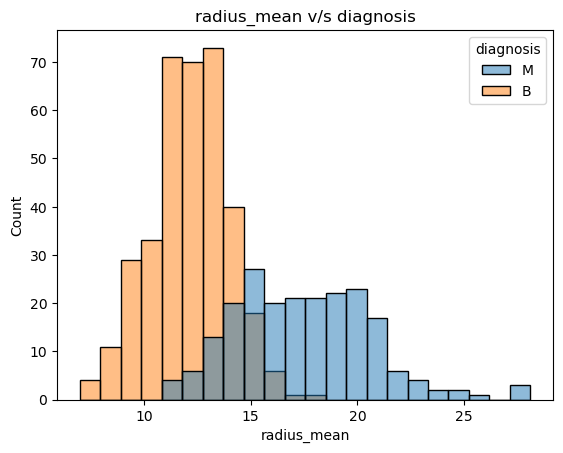

In [15]:
sns.histplot(data=df, x="radius_mean", hue = 'diagnosis')
plt.title('radius_mean v/s diagnosis')
plt.xlabel('radius_mean')
plt.plot()

[]

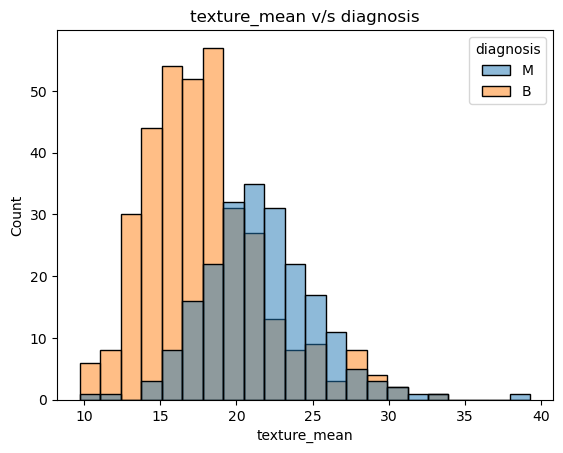

In [16]:
sns.histplot(data=df, x="texture_mean", hue = 'diagnosis')
plt.title('texture_mean v/s diagnosis')
plt.xlabel('texture_mean')
plt.plot()

[]

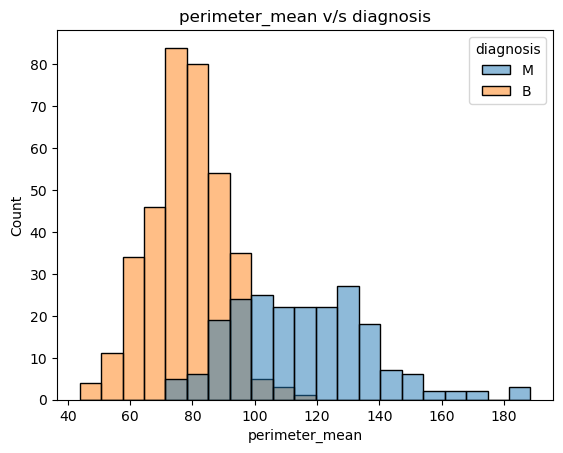

In [17]:
sns.histplot(data=df, x="perimeter_mean", hue = 'diagnosis')

plt.title('perimeter_mean v/s diagnosis')
plt.xlabel('perimeter_mean')
plt.plot()

[]

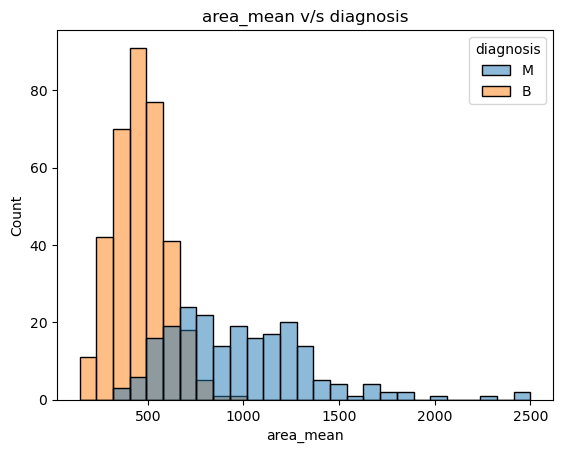

In [18]:
sns.histplot(data=df, x="area_mean", hue = 'diagnosis')

plt.title('area_mean v/s diagnosis')
plt.xlabel('area_mean')
plt.plot()

[]

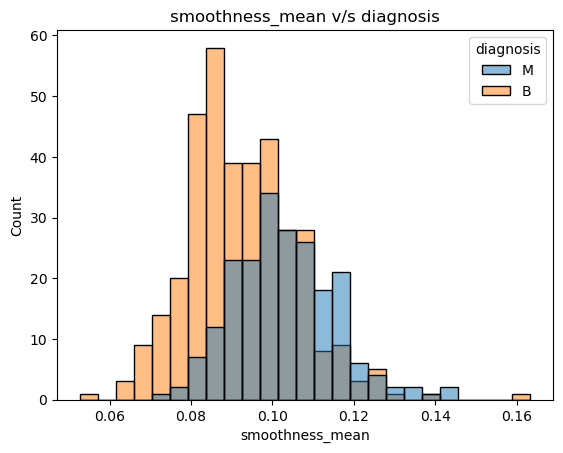

In [19]:
sns.histplot(data=df, x="smoothness_mean", hue = 'diagnosis')

plt.title('smoothness_mean v/s diagnosis')
plt.xlabel('smoothness_mean')
plt.plot()

[]

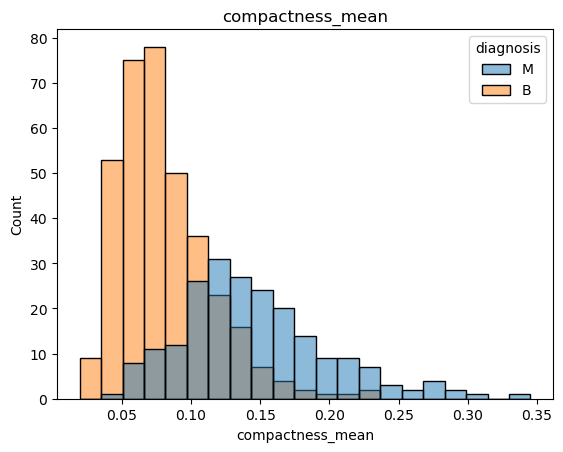

In [20]:
sns.histplot(data=df, x="compactness_mean", hue = 'diagnosis')

plt.title('compactness_mean')
plt.xlabel('compactness_mean')
plt.plot()

[]

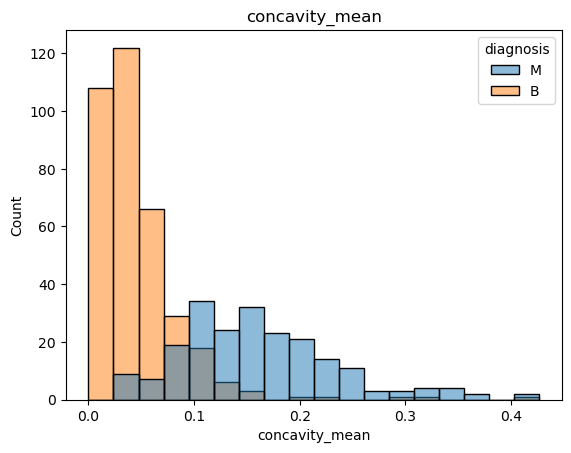

In [21]:
sns.histplot(data=df, x="concavity_mean", hue = 'diagnosis')

plt.title('concavity_mean')
plt.xlabel('concavity_mean')
plt.plot()

[]

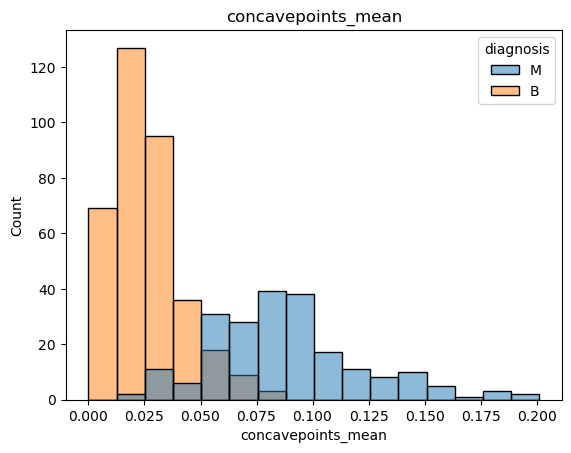

In [22]:
sns.histplot(data=df, x="concave points_mean", hue = 'diagnosis')

plt.title('concavepoints_mean')
plt.xlabel('concavepoints_mean')
plt.plot()

[]

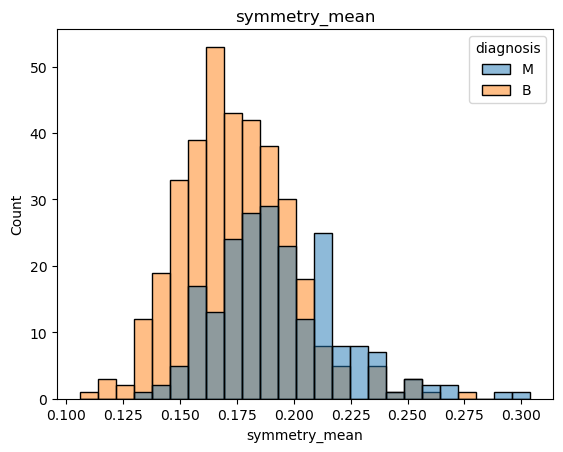

In [23]:
sns.histplot(data=df, x="symmetry_mean", hue = 'diagnosis')

plt.title('symmetry_mean')
plt.xlabel('symmetry_mean')
plt.plot()

[]

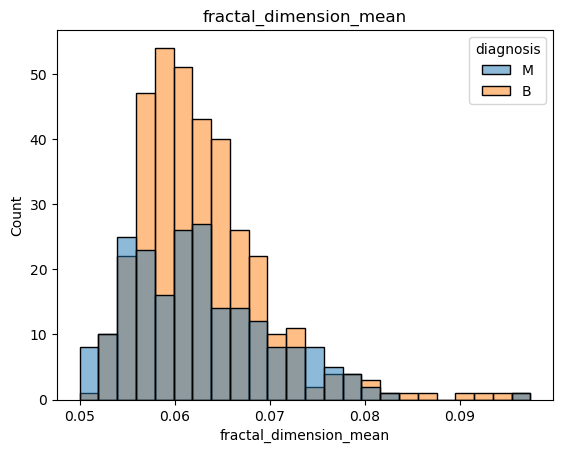

In [24]:
sns.histplot(data=df, x = "fractal_dimension_mean", hue = 'diagnosis')

plt.title('fractal_dimension_mean')
plt.xlabel('fractal_dimension_mean')
plt.plot()

In [25]:
#changing M and B to numerical values 1 and 0 in diagnosis column
#df['diagnosis'] = [1 if i == 'M' else 0 for i in df['diagnosis']]

from sklearn.preprocessing import LabelEncoder
L = LabelEncoder()
L.fit(df['diagnosis'])
L = L.transform(df['diagnosis'])

### checking for correlation between the variables

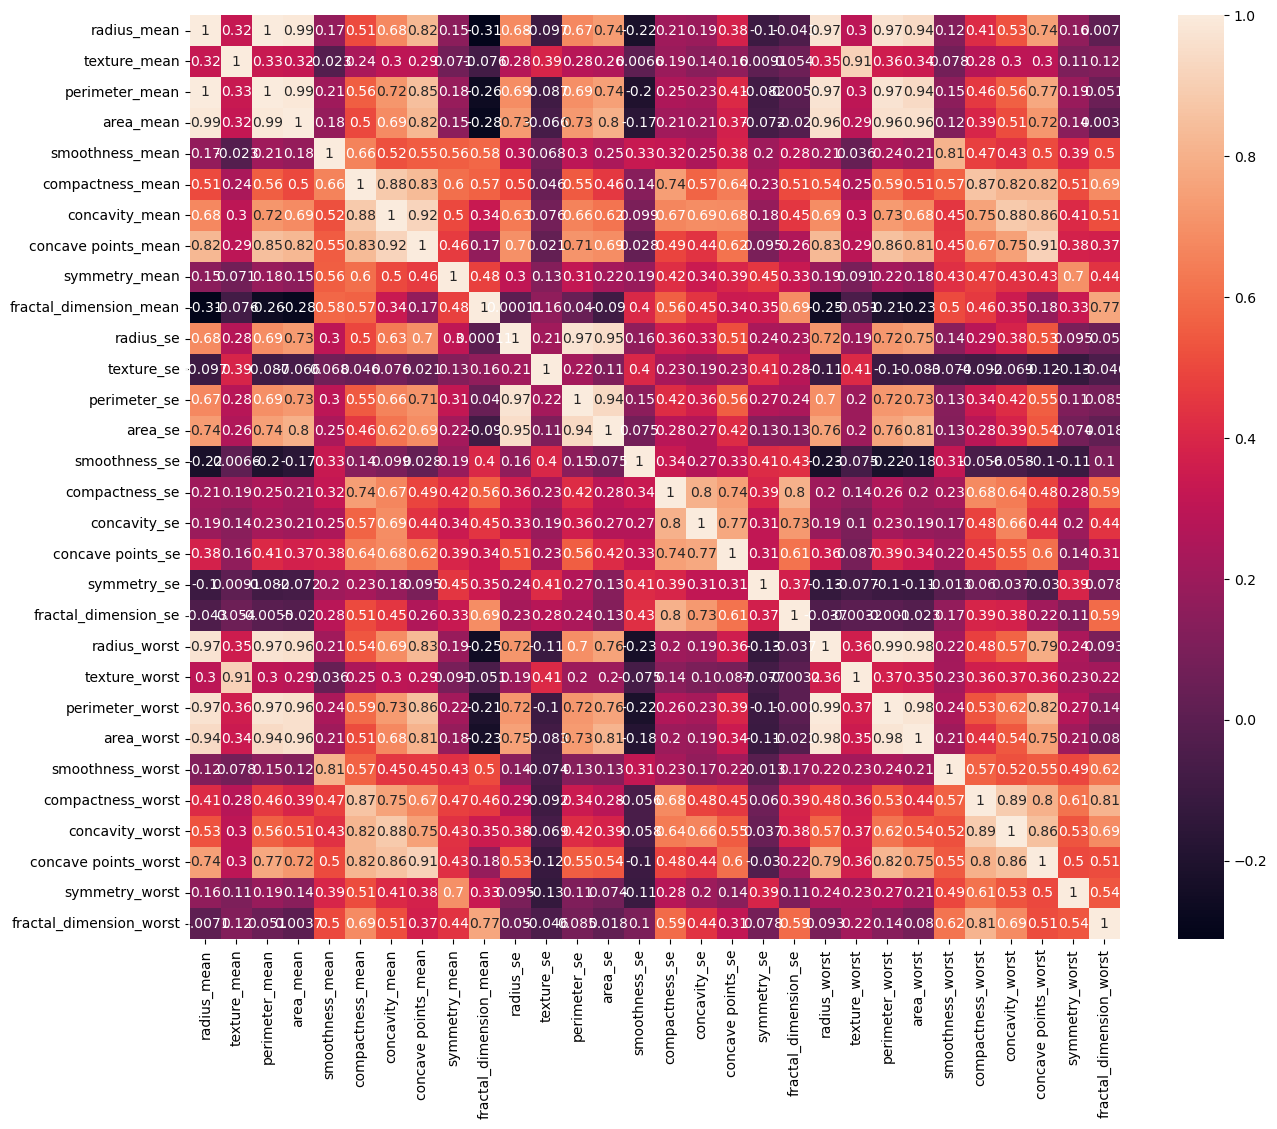

In [26]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)
plt.ioff()

# Python function that you can use to extract highly correlated columns in a heatmap

In [36]:
def extract_highly_correlated_columns(df, threshold=0.9):
    """
    This function takes a pandas DataFrame and a correlation threshold as input,
    and returns a list of highly correlated column pairs based on a heatmap.
    """
    corr_matrix = df.corr()
    # Create a mask for the upper triangle of the correlation matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    # Plot the correlation heatmap
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, mask=mask)
    # Find pairs of highly correlated columns
    highly_correlated_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_pair = (corr_matrix.columns[i], corr_matrix.columns[j])
                highly_correlated_pairs.append(col_pair)
    return highly_correlated_pairs
highly_correlated_pairs = extract_highly_correlated_columns(df, threshold=0.9)

print(highly_correlated_pairs)

[('perimeter_mean', 'radius_mean'), ('area_mean', 'radius_mean'), ('area_mean', 'perimeter_mean'), ('concave points_mean', 'concavity_mean'), ('perimeter_se', 'radius_se'), ('area_se', 'radius_se'), ('area_se', 'perimeter_se'), ('radius_worst', 'radius_mean'), ('radius_worst', 'perimeter_mean'), ('radius_worst', 'area_mean'), ('texture_worst', 'texture_mean'), ('perimeter_worst', 'radius_mean'), ('perimeter_worst', 'perimeter_mean'), ('perimeter_worst', 'area_mean'), ('perimeter_worst', 'radius_worst'), ('area_worst', 'radius_mean'), ('area_worst', 'perimeter_mean'), ('area_worst', 'area_mean'), ('area_worst', 'radius_worst'), ('area_worst', 'perimeter_worst'), ('concave points_worst', 'concave points_mean')]


## Observations

mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.

In [27]:
def extract_highly_correlated_columns(df, threshold=0.8):
    """
    This function takes a pandas DataFrame and a correlation threshold as input,
    and returns a list of highly correlated column pairs based on a heatmap.
    """
    corr_matrix = df.corr()
    # Create a mask for the upper triangle of the correlation matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    # Plot the correlation heatmap
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, mask=mask)
    # Find pairs of highly correlated columns
    highly_correlated_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_pair = (corr_matrix.columns[i], corr_matrix.columns[j])
                highly_correlated_pairs.append(col_pair)
    return highly_correlated_pairs

    return highly_correlated_pairs, common_names

highly_correlated_pairs = extract_highly_correlated_columns(df, threshold=0.9)
print(highly_correlated_pairs)


[('perimeter_mean', 'radius_mean'), ('area_mean', 'radius_mean'), ('area_mean', 'perimeter_mean'), ('concave points_mean', 'concavity_mean'), ('perimeter_se', 'radius_se'), ('area_se', 'radius_se'), ('area_se', 'perimeter_se'), ('radius_worst', 'radius_mean'), ('radius_worst', 'perimeter_mean'), ('radius_worst', 'area_mean'), ('texture_worst', 'texture_mean'), ('perimeter_worst', 'radius_mean'), ('perimeter_worst', 'perimeter_mean'), ('perimeter_worst', 'area_mean'), ('perimeter_worst', 'radius_worst'), ('area_worst', 'radius_mean'), ('area_worst', 'perimeter_mean'), ('area_worst', 'area_mean'), ('area_worst', 'radius_worst'), ('area_worst', 'perimeter_worst'), ('concave points_worst', 'concave points_mean')]


### Creating a test set and a training set


In [28]:
x = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']

### Splitting the data into test and train data

In [29]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)

### Standardizing the data

In [30]:
sc = StandardScaler()
train_X = sc.fit_transform(train_x) # scaling the train data
test_X= sc.transform(test_x)

# Generic function for making a classification model and accessing the performance. 

In [31]:
def predict_all_ml_models(df, target_col):
    """
    This function takes a pandas DataFrame and a target column as input,
    and predicts all machine learning models on the data and calculates the accuracy scores.
    """
    # Split the data into train and test sets
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Define the machine learning models
    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Support Vector Machine": SVC(),
        "K-Nearest Neighbors": KNeighborsClassifier()
    }
    # Fit and predict all machine learning models and calculate the accuracy scores
    accuracy_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[name] = accuracy
    return accuracy_scores


# Predict all machine learning models and calculate accuracy scores

In [32]:
accuracy_scores = predict_all_ml_models(df, target_col="diagnosis")

print(accuracy_scores)

{'Logistic Regression': 0.9649122807017544, 'Decision Tree': 0.9298245614035088, 'Random Forest': 0.9649122807017544, 'Support Vector Machine': 0.9473684210526315, 'K-Nearest Neighbors': 0.956140350877193}


### Comparison of all models

In [33]:
def scores_to_dataframe(scores):
    """
    This function takes a dictionary of model names and accuracy scores as input,
    and converts it into a pandas DataFrame.
    """
    df = pd.DataFrame.from_dict(scores, orient="index", columns=["Accuracy Score"])
    df.index.name = "Model Name"
    return df

# Convert the accuracy scores dictionary into a pandas DataFrame
accuracy_scores = predict_all_ml_models(df, target_col="diagnosis")
df_scores = scores_to_dataframe(accuracy_scores)

print(df_scores)

                        Accuracy Score
Model Name                            
Logistic Regression           0.964912
Decision Tree                 0.947368
Random Forest                 0.964912
Support Vector Machine        0.947368
K-Nearest Neighbors           0.956140


## Conclusion

The best model to be used for diagnosing breast cancer as found in this analysis is the Random Forest model. It gives a prediction accuracy of ~95%.
we prefer random forest over logistic regression because it is not effected by outliers.